# EDA Basic Lesson

As usual, we import the necessary libraries.

In [5]:
import pandas as pd
import numpy as np

## Summarizing and Computing Descriptive Statistics

`Series` and `DataFrame` have a number of common mathematical and statistical methods. Most of these fall into the category of _reductions_ or _summary statistics_, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame. They have built-in handling for missing data.

In [6]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"], columns=["one", "two"])

In [7]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


As always, the default `axis` is `axis=0` for `DataFrame` methods, which means that by default, the reduction takes place over rows.

The method returns a Series containing column sums.

In [8]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [9]:
# passing axis='columns' or axis=1 sums over the columns instead
df.sum(axis="columns")

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

When an entire row or column contains only missing values, the sum is 0, whereas if any value is NA, it will be skipped. This can be disabled with the `skipna` option.

In [10]:
df.sum(skipna=False)

one   NaN
two   NaN
dtype: float64

In [11]:
df.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

Some methods like `idxmin` and `idxmax`, return indirect statistics like the index value where the minimum or maximum values are attained:

In [12]:
df.idxmax()

one    b
two    d
dtype: object

In [13]:
df.idxmin()

one    d
two    b
dtype: object

Other methods are accumulations (as opposed to reductions):

In [14]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Refer to the [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) for a list of methods.

> Compute the mean across rows and columns.

`describe` produces multiple summary statistics in one shot:

In [15]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


It produces different summary statistics for non-numerical data.

In [16]:
obj = pd.Series(["c", "a", "d", "a", "b", "b", "c", "c"])

obj.describe()

count     8
unique    4
top       c
freq      3
dtype: object

`unique` returns a Numpy array of unique values in a `Series`.

In [17]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

You can also use `value_counts` to return a `Series` containing unique values as its index and frequencies as its values, ordered count in descending order.

In [18]:
obj.value_counts()

c    3
a    2
b    2
d    1
dtype: int64

You can also sort the result by index.

In [19]:
obj.value_counts().sort_index()

a    2
b    2
c    3
d    1
dtype: int64

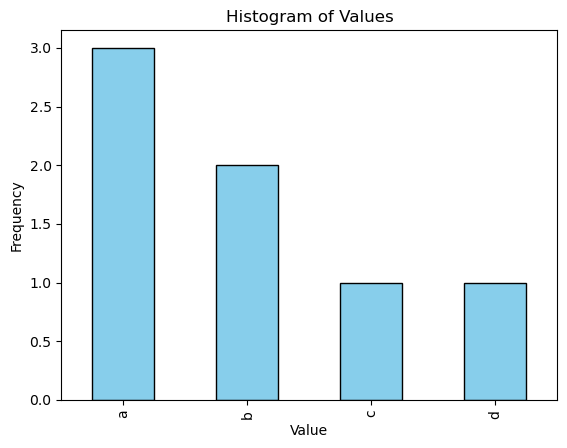

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the Series
obj = pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd'])

# Count + Sort + Plot
obj.value_counts().sort_index().plot(
    kind='bar',       # or 'barh' for horizontal bars
    color='skyblue',
    edgecolor='black'
)

plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


> Sort value counts in ascending order.

## Handling Missing Data

Missing data is common in most data analysis applications. One of the goals in designing pandas was to make working with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.

The `isna` method gives us a Boolean Series with `True` where values are null:

In [53]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])

float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [54]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In statistics applications, NA data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

The built-in Python `None` value is also treated as NA:

In [55]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])

string_data

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [56]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

You can use `dropna` to filter out missing data. On a Series, it returns the Series with only the non-null data and index values:

In [57]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])

data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [58]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [59]:
# which is equivalent to this

data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex. You may want to drop rows or columns which are all NA or just those containing any NAs. `dropna` by default drops any row containing a missing value:

In [60]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], 
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [61]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


Passing `how='all'` will only drop rows that are all NA:

In [62]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass `axis=1` or `axis='columns'`:

In [63]:
# first let's add a column of all NaNs

data[4] = np.nan

data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [64]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Suppose you want to keep only rows containing at most a certain number of missing observations. You can indicate this with the `thresh` argument:

In [65]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
# set some missing values
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

df

,0,1,2
0,-1.053401,NaN,NaN
1,1.221807,NaN,NaN
2,0.828811,NaN,2.768509
3,0.823185,NaN,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


In [66]:
df.dropna()

,0,1,2
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


In [67]:
df.dropna(thresh=2)

,0,1,2
2,0.828811,NaN,2.768509
3,0.823185,NaN,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


Rather than filtering out missing data, you may want to fill in the "holes" in any number of ways. Calling `fillna` with a constant replaces missing values with that value:

In [68]:
df.fillna(0)

,0,1,2
0,-1.053401,0.000000,0.000000
1,1.221807,0.000000,0.000000
2,0.828811,0.000000,2.768509
3,0.823185,0.000000,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


You can also specify different fill values for each column by passing a dict.

In [69]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.053401,0.500000,0.000000
1,1.221807,0.500000,0.000000
2,0.828811,0.500000,2.768509
3,0.823185,0.500000,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


The same interpolation methods available for reindexing can be used with `fillna`, but instead of forward filling, we will try backward filling.

In [70]:
df.fillna(method="bfill")

,0,1,2
0,-1.053401,-0.860773,2.768509
1,1.221807,-0.860773,2.768509
2,0.828811,-0.860773,2.768509
3,0.823185,-0.860773,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


In [71]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-1.053401,NaN,2.768509
1,1.221807,NaN,2.768509
2,0.828811,-0.860773,2.768509
3,0.823185,-0.860773,-0.112821
4,-0.266077,-0.860773,-0.024194
5,0.107390,-3.033108,0.485457
6,-0.103897,-1.531848,0.975603


A common replacement value is the mean or median statistics:

In [72]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])

data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [73]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [74]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

df.iloc[[2,4,5], 1] = np.nan
df.iloc[4:, 2] = np.nan
df.iloc[3:5, 0] = np.nan

df

,0,1,2
0,0.097219,0.057451,-1.207608
1,-1.147008,0.334020,-3.190133
2,0.639350,NaN,-0.225974
3,NaN,-1.862182,-0.415830
4,NaN,NaN,NaN
5,-0.442299,NaN,NaN


> Handle the missing values in df with the following methods:
> 1. Remove rows with any missing values.
> 2. Remove rows with all missing values.
> 3. Fill missing values with forward fill.
> 4. Fill missing values with mean of the column.

In [75]:
df_row_missing_values_removed = df.dropna()
print(df_row_missing_values_removed)


          0         1         2
0  0.097219  0.057451 -1.207608
1 -1.147008  0.334020 -3.190133


In [76]:
df_row_all_missing_values_removed = df.dropna(how="all")
print(df_row_all_missing_values_removed)

          0         1         2
0  0.097219  0.057451 -1.207608
1 -1.147008  0.334020 -3.190133
2  0.639350       NaN -0.225974
3       NaN -1.862182 -0.415830
5 -0.442299       NaN       NaN


In [77]:
df_ffill = df.fillna(method='ffill')
print(df_ffill)


          0         1         2
0  0.097219  0.057451 -1.207608
1 -1.147008  0.334020 -3.190133
2  0.639350  0.334020 -0.225974
3  0.639350 -1.862182 -0.415830
4  0.639350 -1.862182 -0.415830
5 -0.442299 -1.862182 -0.415830


In [78]:
df_mean = df.fillna(df.mean())
print(df_mean)


          0         1         2
0  0.097219  0.057451 -1.207608
1 -1.147008  0.334020 -3.190133
2  0.639350 -0.490237 -0.225974
3 -0.213184 -1.862182 -0.415830
4 -0.213184 -0.490237 -1.259886
5 -0.442299 -0.490237 -1.259886


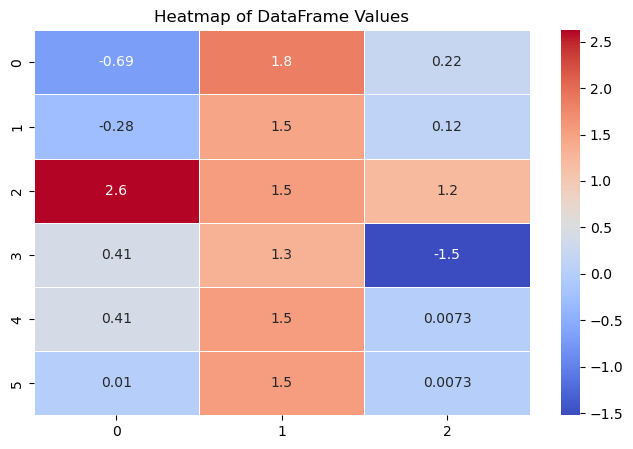

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    0: [-0.691826, -0.281469, 2.622442, np.nan, np.nan, 0.009985],
    1: [1.837207, 1.472426, np.nan, 1.318744, np.nan, np.nan],
    2: [0.224503, 0.123648, 1.204342, -1.523459, np.nan, np.nan]
}
df = pd.DataFrame(data)

df_filled = df.fillna(df.mean(numeric_only=True))
plt.figure(figsize=(8, 5))
sns.heatmap(df_filled, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of DataFrame Values")
plt.show()



## Handling Duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:

In [84]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The dataframe method `duplicated` returns a boolean Series indicating whether each row is a duplicate or not:

In [85]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

`drop_duplicates` returns a DataFrame where the duplicated array is `False`:

In [86]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


You can specify any subset of columns to detect duplicates. Suppose we had an additional column of values and wanted to filter duplicates only based on the 'k1' column:

In [87]:
data["v1"] = range(7)

data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [93]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


`duplicate` and `drop_duplicates` by default keep the first observed value combination. Passing `keep='last'` will return the last one:

In [94]:
data.drop_duplicates(subset=["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data

A common step in data cleaning is transforming data based on the values in an array, Series, or column in a DataFrame.

In [95]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", 
                                "corned beef", "bacon", "pastrami", "honey ham", 
                                "nova lox"],
                         "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you want to add a column indicating the animal type that each food came from. Let's map the food type to the animal type by creating a dictionary:

In [96]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox": "salmon"
}

The `map` method on a Series accepts a function or dict-like object containing a mapping.

In [97]:
data["animal"] = data["food"].map(meat_to_animal)

data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


Passing a function works too:

In [98]:
def get_animal(x):
    return meat_to_animal[x]

data["food"].map(get_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

`replace` provides a more generic way to do element-wise replacement:

In [99]:
data = pd.Series([1, -999, 2, -999, -1000, 3])

data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

The `-999` values might be sentinel values for missing data. To replace these with NA values:

In [100]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

You can also replace multiple values at once by passing a list:

In [101]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes or a dict:

In [102]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [103]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [116]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

df.iloc[2:, 1] = -999
df.iloc[4:, 2] = 999

df

,0,1,2
0,0.533350,0.362234,0.043456
1,1.562453,0.783628,0.043249
2,-0.617263,-999.000000,-0.929414
3,-1.465432,-999.000000,-1.355052
4,-1.606554,-999.000000,999.000000
5,0.672620,-999.000000,999.000000


> Replace -999 with NaN and 999 with 0.

In [117]:
df.replace({-999: np.nan, 999: 0})

,0,1,2
0,0.533350,0.362234,0.043456
1,1.562453,0.783628,0.043249
2,-0.617263,NaN,-0.929414
3,-1.465432,NaN,-1.355052
4,-1.606554,NaN,0.000000
5,0.672620,NaN,0.000000


## Renaming Axis Indexes

Axis labels (index or columns) can be similarly transformed by a function or mapping of some form to produce new, differently labeled objects.

In [118]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [119]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can use the `map` method like a Series.

In [120]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

Assigning back to the index will modify the DataFrame in-place:

In [121]:
data.index = data.index.map(transform)

In [122]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


You can also use the `rename` method which accepts a function or dict-like object providing a mapping.

In [123]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [124]:
data.rename(index={"OHIO": "INDIANA"}, columns={"three": 3})

,one,two,3,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Handling Outliers

Consider a DataFrame with some normally distributed data:

In [125]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

data

,0,1,2,3
0,0.662660,0.037951,0.949794,0.620760
1,-1.069849,0.935405,1.650877,1.458714
2,-2.789686,-1.476190,-1.368107,0.063339
3,-0.528365,-0.016366,-0.877281,-0.630246
4,0.767454,-0.226649,0.361599,0.109867
...,...,...,...,...
995,-0.843583,1.249271,-1.622029,1.075314
996,0.714323,-0.896115,1.592709,-0.554363
997,-1.204668,1.180114,1.676059,-0.494602
998,-1.971069,0.169201,-0.553651,-0.200961


In [126]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.025549,-0.013591,0.040797,-0.037310
std,1.019871,1.009055,1.026490,1.030252
min,-3.355668,-3.687314,-3.783693,-3.637667
25%,-0.710456,-0.721666,-0.627057,-0.715874
50%,-0.017661,0.004676,0.041308,-0.045277
75%,0.664054,0.639364,0.709781,0.631286
max,2.820068,2.981446,3.299480,3.326346


Let's assume that values exceeding 3 in absolute value are outliers (the threshold value can be adjusted accordingly). To find the values in one of the columns exceeding 3 or -3:

In [127]:
col = data[2]

col[col.abs() > 3]


534   -3.248352
595    3.025280
676    3.299480
910   -3.783693
Name: 2, dtype: float64

To select all rows having a value exceeding 3 or -3, you can use the `any` method on a Boolean DataFrame:

In [128]:
# The parentheses around data.abs() > 3 are necessary in order to call the any method on the result of the comparison operation
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
8,0.090831,-3.154510,0.278962,-1.152323
87,-0.403446,-1.312749,-0.250001,3.033577
168,0.330359,1.126111,-0.083048,-3.018091
350,-3.355668,1.898341,-0.776114,0.310549
438,-0.244244,-0.482227,0.987729,3.326346
534,-0.434867,0.097735,-3.248352,1.018146
595,0.938909,-0.245651,3.025280,-1.072014
676,-0.759415,-1.123498,3.299480,1.045280
697,-1.521244,-3.687314,-1.392657,-1.082097
707,0.129200,-3.060757,-0.409789,-1.393925


To deal with outliers, you can cap them to a maximum or minimum value. Here `np.sign` returns an array of 1 and -1 depending on the sign of the values:

In [129]:
data[data.abs() > 3] = np.sign(data) * 3

In [130]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.024624,-0.012688,0.041504,-0.037014
std,1.017031,1.006128,1.022109,1.027047
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.710456,-0.721666,-0.627057,-0.715874
50%,-0.017661,0.004676,0.041308,-0.045277
75%,0.664054,0.639364,0.709781,0.631286
max,2.820068,2.981446,3.000000,3.000000


Another common way to deal with outliers is to drop rows that contain them.

In [131]:
data[(data.abs() < 3).all(axis="columns")]

,0,1,2,3
0,0.662660,0.037951,0.949794,0.620760
1,-1.069849,0.935405,1.650877,1.458714
2,-2.789686,-1.476190,-1.368107,0.063339
3,-0.528365,-0.016366,-0.877281,-0.630246
4,0.767454,-0.226649,0.361599,0.109867
...,...,...,...,...
995,-0.843583,1.249271,-1.622029,1.075314
996,0.714323,-0.896115,1.592709,-0.554363
997,-1.204668,1.180114,1.676059,-0.494602
998,-1.971069,0.169201,-0.553651,-0.200961


> Why `all` instead of `any`?
>
> Change the cap values to 2 and -2 instead.

## Permutation and Random Sampling

Permuting (randomly reordering) a Series or the rows in a DataFrame is possible using the `numpy.random.permutation` function. Calling `permutation` with the length of the axis you want to permute produces an array of integers indicating the new ordering:

In [132]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))

df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [148]:
sampler = np.random.permutation(5)

sampler

array([0, 4, 2, 3, 1])

You can then use `iloc` indexing or `take` method to reorder your data based on the randomly generated integer array:

In [149]:
df.iloc[sampler]

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


In [150]:
df.take(sampler)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


Permuting columns work too:

In [151]:
column_sampler = np.random.permutation(df.shape[1])

column_sampler

array([1, 2, 5, 6, 4, 3, 0])

In [152]:
df.take(column_sampler, axis=1)

,1,2,5,6,4,3,0
0,1,2,5,6,4,3,0
1,8,9,12,13,11,10,7
2,15,16,19,20,18,17,14
3,22,23,26,27,25,24,21
4,29,30,33,34,32,31,28


To select a random subset without replacement (the same row cannot appear twice), you can use the `sample` method on Series and DataFrame:

In [153]:
df.sample(n=3)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34


You can also sample with replacement (allowing repeat choices), by passing `replace=True`:

In [ ]:
choices = pd.Series([5, 7, -1, 6, 4])

choices.sample(n=10, replace=True)

> Sample `df` using the parameter `frac` instead of `n`.

## String Manipulation

Cleaning up a messy dataset for analysis often requires a lot of string manipulation. To complicate matters, a column containing strings will sometimes have missing data:

In [154]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com", "Wes": np.nan}

data = pd.Series(data)

data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

String and regular expression methods can be applied (passing a lambda or other function) to each value using `map`, but it will fail on the NA values. To cope with this, Series has array-oriented methods for string operations that skip NA values. These are accessed through Series's `str` attribute.

In [155]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

Note that the result of this operation has an `object` dtype. 

Pandas has `extension types` that provide for specialized treatment of strings, integers and boolean data. We discussed `StringDType` in the previous lesson. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes) for more information.

In [156]:
data_as_string = data.astype('string')

data_as_string

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [157]:
data_as_string.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

You can also slice strings using this syntax:

In [158]:
data_as_string.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes       <NA>
dtype: string

Regular expressions can be used, too, along with any `re` options like `IGNORECASE`:

In [159]:
import re

In [160]:
# regex email pattern
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

There are a couple of ways to do vectorized element retrieval. Either use `str.get` or index into the `str` attribute:

In [161]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [162]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

The `extract` method will return the captured groups of a regular expression as a DataFrame:

In [163]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


Refer to the [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling) for a list of string methods.

> Get the 1st group of the regex email pattern.
>
> Convert data into titlecase.

## Categorical Data

Pandas has a `categorical` type for string values with a smaller set of distinct values that are repeated. Consider the following example:

In [164]:
values = pd.Series(["apple", "orange", "apple", "apple"] * 2)

values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [165]:
values.unique()

array(['apple', 'orange'], dtype=object)

In [166]:
values.value_counts()

apple     6
orange    2
dtype: int64

Many data systems (for data warehousing, statistical computing, or other uses) have developed specialized approaches for representing data with repeated values for more efficient storage and computation. In data warehousing, a best practice is to use so-called dimension tables containing the distinct values and storing the primary observations as `integer keys` referencing the dimension table:

In [167]:
values = pd.Series([0, 1, 0, 0] * 2)

dim = pd.Series(["apple", "orange"])

values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [168]:
dim

0     apple
1    orange
dtype: object

We can use `take` to restore the original Series of strings:

In [169]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

This representation as integers is called the _category codes_ or simply _codes_. The array of distinct values can be called the _categories_.

The categorical representation can yield significant performance improvements when you are doing analytics. You can also perform transformations on the categories while leaving the codes unmodified.

Pandas' `categorical` type holds data that uses the integer-based categorical representation or encoding.

In [170]:
fruits = ["apple", "orange", "apple", "apple"] * 2
N = len(fruits)

# to ensure reproducibility
rng = np.random.default_rng(seed=12345)

df = pd.DataFrame({"fruit": fruits, 
                   "basket_id": np.arange(N), 
                   "count": rng.integers(3, 15, size=N), 
                   "weight": rng.uniform(0, 4, size=N)}, 
                  columns=["basket_id", "fruit", "count", "weight"])

df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [171]:
fruit_cat = df['fruit'].astype('category')

fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

The values for `fruit_cat` are now an instance of `pandas.Categorical`, which you can access via the `.array` attribute:

In [172]:
c = fruit_cat.array

type(c)

pandas.core.arrays.categorical.Categorical

In [173]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [174]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

A trick to get mapping between codes and categories is:

In [ ]:
dict(enumerate(c.categories))

In [175]:
df['fruit'] = df['fruit'].astype('category')

df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


If you have obtained categorical encoded data from another source, you can use the `pd.Categorical.from_codes` constructor:

In [176]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]

my_cats = pd.Categorical.from_codes(codes, categories)

my_cats

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

Unless explicitly specified, categorical conversions assume no specific ordering of the categories. So the `categories` array may be in a different order depending on the ordering of the input data. When using `from_codes` or any of the other constructors, you can indicate that the categories have a meaningful ordering:

In [177]:
ordered_cats = pd.Categorical.from_codes(codes, categories, ordered=True)

ordered_cats

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

The output `[foo < bar < baz]` indicates that `'foo'` precedes `'bar'` in the ordering, and so on. 

### Computations with Categoricals

Continuous data is often discretized or otherwise separated into “bins” for analysis. Suppose you have data about a group of people in a study, and you want to group them into discrete age buckets:

In [178]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Assuming you want to divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To do so, you can use `cut`:

In [179]:
bins = [18, 25, 35, 60, 100]

age_cat = pd.cut(ages, bins)

age_cat

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

The object returned is `categorical`. Each bin is identified by a special (unique to pandas) `interval` value type containing the lower and upper limit of each bin:

In [180]:
age_cat.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [181]:
age_cat.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [182]:
age_cat.categories[0]

Interval(18, 25, closed='right')

In [183]:
pd.value_counts(age_cat)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In the string representation of an interval, a parenthesis means that the side is open (exclusive), while the square bracket means it is closed (inclusive). You can change which side is closed by passing `right=False`:

In [184]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

You can override the default interval-based bin labeling by passing a list or array to the `labels` option:

In [185]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]

pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

If you pass an integer number of bins to pandas.cut instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data. 

In [ ]:
data = np.random.uniform(size=20)

pd.cut(data, 4, precision=2)

The `precision=2` option limits the decimal precision to two digits.

> Cut `ages` into 5 bins instead of 4. Set the labels to `['Youth', 'YoungAdult', 'MiddleAged', 'Senior', 'Elderly']`.

Series containing categorical data have several special methods similar to the `Series.str` specialized string methods. This also provides convenient access to the categories and codes. 

The special accessor attribute `cat` provides access to categorical methods:

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')

cat_s

In [ ]:
cat_s.cat.codes

In [ ]:
cat_s.cat.categories

Suppose that we know the actual set of categories for this data extends beyond the four values observed in the data. We can use the `set_categories` method to change them:

In [ ]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)

cat_s2

While it appears that the data is unchanged, the new categories will be reflected in operations that use them. For example, `value_counts` respects the categories, if present:


In [ ]:
cat_s.value_counts()

In [ ]:
cat_s2.value_counts()

Conversely, you can remove categories not in your data by calling `remove_unused_categories`:

In [ ]:
cat_s2.cat.remove_unused_categories()

### Computing Indicator / Dummy Variables

Another type of transformation for statistical modeling or machine learning applications is converting a categorical variable into a _dummy_ or _indicator_ matrix. If a column in a DataFrame has `k` distinct values, you would derive a matrix or DataFrame with k columns containing all 1s and 0s.

In [186]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"], 
                   "data1": range(6)})

df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [187]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


You can also add a prefix to the columns:

In [188]:
dummies = pd.get_dummies(df["key"], prefix="key")

dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


A useful recipe for statistical applications is to combine `get_dummies` with a discretization function like `cut`:

In [189]:
np.random.seed(12345)

values = np.random.uniform(size=10)

values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [190]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


> Cut values into 4 bins and create dummy variables.

## Reading / Writing data

Reading and writing data is an essential part of data analysis. Pandas has built-in methods for reading and writing data in different formats. It is also known as data input/output (IO).

### Text files

Pandas features a number of functions for reading (writing) tabular data from (to) text files as DataFrames. You can use `read_csv` to read comma-separated values (CSV) files (which are often exported from spreadsheets or databases). 

For a full list of input/output functions, see [the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/io.html). The optional arguments for these functions may fall into a few categories:

* **Indexing**: You can treat one or more columns as the index of the DataFrame, or you can let pandas create a default integer index.
* **Type inference and data conversion**: This includes the user-defined value conversions and custom list of missing value markers.
* **Datetime parsing**: Includes combining capability, including combining date and time information spread over multiple columns into a single column in the result.
* **Iterating**: Support for iterating over chunks of very large files.
* **Unclean data issues**: Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.

Some of these functions perform type inference, because the column data types are not part of the data format. That means you don’t necessarily have to specify which columns are numeric, integer, Boolean, or string.

In [ ]:
!cat ../data/ex1.csv

In [ ]:
df = pd.read_csv("../data/ex1.csv")

df

A file will not always have a header row.

In [ ]:
!cat ../data/ex2.csv

To read this file, you have a couple of options. You can allow pandas to assign default column names, or you can specify names yourself:

In [ ]:
pd.read_csv("../data/ex2.csv", header=None)

In [ ]:
pd.read_csv("../data/ex2.csv", names=["a", "b", "c", "d", "message"])

Suppose you wanted the `message` column to be the index of the returned DataFrame. You can either indicate you want the column at index 4 or named `"message"` using the `index_col` argument:

In [ ]:
names = ["a", "b", "c", "d", "message"]

pd.read_csv("../data/ex2.csv", names=names, index_col="message")

In some cases, a table might not have a fixed delimiter, using whitespace or some other pattern to separate fields. Consider a text file that looks like this:

In [ ]:
!cat ../data/ex3.txt

In [ ]:
result = pd.read_csv("../data/ex3.txt", sep="\s+")

result

Because there was one fewer column name than the number of data rows, `read_csv` infers that the first column should be the DataFrame’s index in this special case.

The file parsing functions have many additional arguments to help you handle the wide variety of exception file formats that occur. For example, you can skip the first, third, and fourth rows of a file with `skiprows`:

In [ ]:
!cat ../data/ex4.csv

In [ ]:
pd.read_csv("../data/ex4.csv", skiprows=[0, 2, 3])

Handling missing values is an important and frequently nuanced part of the file reading process. Missing data is usually either not present (empty string) or marked by some sentinel (placeholder) value. By default, pandas uses a set of commonly occurring sentinels, such as `NA` and `NULL`:

In [ ]:
!cat ../data/ex5.csv

In [ ]:
result = pd.read_csv("../data/ex5.csv")

result

In [ ]:
result.isna()

`read_csv` has a list of many default NA value representations, but these defaults can be disabled with the `keep_default_na` option:

In [ ]:
result2 = pd.read_csv("../data/ex5.csv", keep_default_na=False, na_values=["NA"])

result2

In [ ]:
result2.isna()

Different NA sentinels can be specified for each column in a dictionary:

In [ ]:
sentinels = {"message": ["NULL", "NA"], "something": ["two"]}

pd.read_csv("../data/ex5.csv", na_values=sentinels, keep_default_na=False)

In [ ]:
result = pd.read_csv("../data/ex3.txt", sep="\s+")

result

Using DataFrame’s `to_csv` method, we can write the data out to a comma-separated file:

In [ ]:
result.to_csv("../data/out.csv")

In [ ]:
!cat ../data/out.csv

You can also avoid writing the index:

In [ ]:
result.to_csv("../data/out.csv", index=False)

In [ ]:
!cat ../data/out.csv

> Write only columns A and B to the same file using a parameter in `to_csv`.

### Binary files

`pickle` format is a format that is optimized for reading and writing in Python. It is a format that is specific to Python, and cannot be read by other languages. It is recommended only as a short-term storage format.

In [ ]:
result.to_pickle('../data/out.pkl')

In [ ]:
data = pd.read_pickle('../data/out.pkl')

data

You can read excel file too:

In [ ]:
xlsx = pd.ExcelFile("../data/Resaleflatpricesbasedonregistrationdate.xlsx")

xlsx.sheet_names

In [ ]:
xlsx.parse(sheet_name="2017")

If you are reading multiple sheets in a file, then it is faster to create the `.ExcelFile`, but you can also simply pass the filename to `.read_excel`:

In [ ]:
frame = pd.read_excel("../data/Resaleflatpricesbasedonregistrationdate.xlsx", sheet_name="2017")

frame

To write pandas data to Excel format, you must first create an `ExcelWriter`, then write data to it using the pandas object's `to_excel` method:

In [ ]:
writer = pd.ExcelWriter('../data/out.xlsx')

frame.to_excel(writer, 'Sheet1')

writer.close()


You can also pass a file path to `to_excel` and avoid the `ExcelWriter`:

In [ ]:
frame.to_excel('../data/out.xlsx')

> Sample 100 rows then write to file: `../data/samples.xlsx`.

### Databases

You can connect to any databases using the `sqlalchemy` library.

Here, let's connect to the `DuckDB` database we created in unit 4.

In [ ]:
import sqlalchemy as sqla

Let's get the absolute path of the parent (root) directory.

In [ ]:
import os 

parent_dir = os.path.abspath(os.path.pardir)

Then, create the `sqlalchemy` engine to connect to the database.

In [ ]:
engine = sqla.create_engine(f'duckdb:///{parent_dir}/data/unit-1-4.db')

You can read the whole table into a DataFrame:

In [ ]:
df = pd.read_sql('resale_flat_prices_2017', engine)

In [ ]:
df

Or SQL query:

In [ ]:
df = pd.read_sql("SELECT * FROM resale_flat_prices_2017", engine)

In [ ]:
df

Write a filtered DataFrame to a new table:

In [ ]:
df_yishun = df[df.town == "YISHUN"]

df_yishun.to_sql("yishun_flat_prices_2017", engine)

In [ ]:
engine.table_names()

> Read only flats from `BISHAN` to a new dataframe.
>
> Then, write the dataframe to a new database table `bishan_flat_prices_2017`.